In [1]:
import nltk
#nltk.download()

<h1>Working with text!</h1>


<h2>Sentiment Analysis</h2>
Identify entities and emotions in a sentence and use these to determine if the entity is being viewed positively or negatively

<h3>Easy examples</h3>
<li>I had an <b style="color:green">excellent</b> souffle at the restaurant Cavity Maker</li>
<li>Excellent is a positive word for both the souffle as well as for the restaurant</li>

<h3>Not so easy examples</h3>
<h4>Often, looking at words alone is not enough to figure out the sentiment</h4>
<li><i>The Girl on the Train is an <span style="color:green">excellent</span> book for a ‘stuck at home’ snow day</i></li> This one is easy since it includes an explicit positive opinion using a positive word
<li><i>The Girl on the Train is an <span style="color:green">excellent</span> book for using as a liner for your cat’s litter box</i></li> Not so simple! The positive word "excellent" is used with a negative connotation. 
<li><i>The Girl on the Train is <span style="color:green">better</span> than Gone Girl</i></li> The positive word is used as a comparator. Whether the writer likes The Girl on the Train or not depends on what he or she thinks of Gone Girl

<h4>Bottom line</h4>
Sentiment analysis is generally a starting point in analyzing a text and is then coupled with other techniques (e.g., topic analysis)

<h2>Sentiment analysis is usually done using a corpus of positive and negative words</h2>
<li>Some sources compile lists of positive and negative words
<li>Others include the polarity - the degree of positivity or negativity - of each word

<h2>Sources of sentiment coded words</h2>
<ol>
<li>Hu and Liu's sentiment analysis lexicon: words coded as either positive or negative</li>
<ul>
<li>http://ptrckprry.com/course/ssd/data/positive-words.txt
<li>http://ptrckprry.com/course/ssd/data/negative-words.txt
</ul>
<li>NRC Emotion Lexicon: words coded into emotional categories (many languages)</li>
<ul>
<li>http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm</li>
</ul>
<li>SentiWordNet: Lists of words weighted by positive or negative sentiment. Includes guidance on how to use the words</li>
<ul>
<li>http://sentiwordnet.isti.cnr.it/</li>
</ul>
<li>Vadar Sentiment tool: 7800 words with positive or negative polarity</li>
<ul>
<li>Included with python nltk</li>
</ul>
</ol>

<h2>Our examples</h2>
<li>Compiled set of 15 reviews each of four neighborhood restaurants
<li>Presidential inaugural addresses (from Washington to Trump)
<li>Some data from yelp (very limited!)

<h3>Simple sentiment analysis</h3>
Compute the proportion of positive and negative words in a text

In [2]:
def get_words(url):
    import requests
    words = requests.get(url).content.decode('latin-1')
    word_list = words.split('\n')
    index = 0
    while index < len(word_list):
        word = word_list[index]
        if ';' in word or not word:
            word_list.pop(index)
        else:
            index+=1
    return word_list

#Get lists of positive and negative words
p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
positive_words = get_words(p_url)
negative_words = get_words(n_url)

In [3]:
import requests
p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
words = requests.get(p_url).content.decode('latin-1')
word_list = words.split('\n')

In [4]:
';' in word_list[2]
# not ''
fruits = ['apple', 'orange', 'pear']
fruits.pop(2)

'pear'

In [5]:
fruits

['apple', 'orange']

<h4>Read the text being analyzed and count the proportion of positive and negative words in the text</h4>


In [6]:
with open('data/community.txt','r') as f:
    community = f.read()
with open('data/le_monde.txt','r') as f:
    le_monde = f.read()


<h4>Compute sentiment by looking at the proportion of positive and negative words in the text</h4>

In [7]:
from nltk import word_tokenize
cpos = cneg = lpos = lneg = 0
for word in word_tokenize(community):
    if word in positive_words:
        cpos+=1
    if word in negative_words:
        cneg+=1
for word in word_tokenize(le_monde):
    if word in positive_words:
        lpos+=1
    if word in negative_words:
        lneg+=1
print("community {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".format(cpos/len(word_tokenize(community))*100,
                                                        cneg/len(word_tokenize(community))*100,
                                                        (cpos-cneg)/len(word_tokenize(community))*100))
print("le monde  {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".format(lpos/len(word_tokenize(le_monde))*100,
                                                        lneg/len(word_tokenize(le_monde))*100,
                                                        (lpos-lneg)/len(word_tokenize(le_monde))*100))


community 5.09%	 1.12%	 3.97%
le monde  5.33%	 1.49%	 3.85%


<h2>Simple sentiment analysis using NRC data</h2>
<li>NRC data codifies words with emotions</li>
<li>14,182 words are coded into 2 sentiments and 8 emotions</li>


<h4>For example, the word abandonment is associated with anger, fear, sadness and has a negative sentiment</h4>
<li>abandoned	anger	1
<li>abandoned	anticipation	0
<li>abandoned	disgust	0
<li>abandoned	fear	1
<li>abandoned	joy	0
<li>abandoned	negative	1
<li>abandoned	positive	0
<li>abandoned	sadness	1
<li>abandoned	surprise	0
<li>abandoned	trust	0

<h4>Read the NRC sentiment data</h4>

In [8]:
nrc = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count=0
emotion_dict=dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]
        

In [9]:
with open("data/test.txt",'r') as f:
    for line in f:
        #print(type(line))
        line = line.strip().split('\t')
        print(line)

['a', 'b', '1']
['aback', 'joy', '0']


In [10]:
line_t = 'aback	joy	0'
line_t = line_t.strip().split('\t')
line_t

['aback', 'joy', '0']

In [11]:
emotion_dict

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

<h4>Functionalize this</h4>

In [12]:
def get_nrc_data():
    nrc = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [13]:
emotion_dict = get_nrc_data()
emotion_dict['abandoned']

['anger', 'fear', 'negative', 'sadness']

<h1>Yelp API</h1>
<li>We'll use data from yelp to figure out useful things about restaurants near Columbia
<li>https://www.yelp.com/developers/documentation/v3
<li>log into yelp (top right hand corner of the page)
<li>Click <span style="color:blue">Create App</span> on the left hand menu bar
<li>Enter app info (leave optional stuff blank)
<li>Copy the client id and API key to a secure place (this notebook should do the trick or use a text file!)
<li>You might need to generate the API key by clicking on Manage App after creating an App. Make sure you get one!

<h2>If you can't get the Yelp API to work, scroll down to the cell marked "YELP FALLBACK" and use the fallback option to get the data and continue with this exercise!</h2>

<h2>Important note</h2>
<li>The Yelp API has changed since the video accompanying this lecture was recorded
<li>There will be some differences between what the video says and what you see here, particularly when refering to the get_reviews function
<li>But they are fairly small and you should be able to figure out what's what


In [14]:
CLIENT_ID = ""
API_KEY = ""

<h2>I've saved my keys in a file and will use those. Don't run the next cell!</h2>

In [15]:
with open('data/yelp_fusion.txt','r') as f:
    count = 0
    for line in f:
        if count == 0:
            CLIENT_ID = line.strip()
        if count == 1:
            API_KEY = line.strip()
        count+=1


In [16]:
#Check that you have the keys
#print(CLIENT_ID,API_KEY)

In [17]:
# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com' #The API url header
SEARCH_PATH = '/v3/businesses/search' #The path for an API request to find businesses
BUSINESS_PATH = '/v3/businesses/'  # The path to get data for a single business

<h3>Now we can get reviews</h3>
<li>get_reviews(location,number=15) returns the reviews of "number" (default=15) restaurants in the vicinity of "location"
<li>First, we'll write a function that gets  restaurants in the vicinity of location



In [18]:
def get_restaurants(api_key,location,number=15):
    import requests
    
    #First we get the access token
    #Set up the search data dictionary
    search_data = {
    'term': "restaurant",
    'location': location.replace(' ', '+'),
    'limit': number
    }
    url = API_HOST + SEARCH_PATH
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [20]:
get_restaurants(API_KEY,"Columbia University, New York, NY")

[{'alias': 'harlem-taco-and-bowl-company-new-york',
  'categories': [{'alias': 'latin', 'title': 'Latin American'},
   {'alias': 'asianfusion', 'title': 'Asian Fusion'},
   {'alias': 'tacos', 'title': 'Tacos'}],
  'coordinates': {'latitude': 40.80869, 'longitude': -73.95202},
  'display_phone': '(609) 464-4646',
  'distance': 893.7727905885778,
  'id': '_FrbMrCJQMUEoNiKJA3q_w',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/QsLIa6DPEPnOLe4o_d0CpA/o.jpg',
  'is_closed': False,
  'location': {'address1': '2288 Frederick Douglass Blvd',
   'address2': '',
   'address3': None,
   'city': 'New York',
   'country': 'US',
   'display_address': ['2288 Frederick Douglass Blvd', 'New York, NY 10027'],
   'state': 'NY',
   'zip_code': '10027'},
  'name': 'Harlem Taco & Bowl Company',
  'phone': '+16094644646',
  'price': '$',
  'rating': 4.5,
  'review_count': 15,
  'transactions': ['delivery', 'pickup'],
  'url': 'https://www.yelp.com/biz/harlem-taco-and-bowl-company-new-york?adjust_cre

<h4>Then a function that, given a business id, returns a string containing the reviews</h4>


In [21]:
def get_business_review(api_key,business_id):
    import json
    import requests
    business_path = BUSINESS_PATH + business_id+"/reviews"
    url = API_HOST + business_path

    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }


    response = requests.request('GET', url, headers=headers).json()
   
    review_text = ''
    for review in response['reviews']:
        review_text += review['text']
    return review_text

In [22]:
get_business_review(API_KEY,'flat-top-new-york')

"If I didn't get it wrong, brunch is available till 3:30pm on weekends. We got there at 2pm, waited about 5-10min and got seated, so I think reservation...I like the food here... but have to give a poor rating because I had an absolutely horrible experience with the serving staff tonight. I enjoyed coming here...Came here after the Harlem Arts Festival with my family. There were 5 of us total. The place was fully packed for brunch at about 2pm. The place is also..."

<h4>Finally, put all this together to get review data for the set of restaurants</h4>


In [23]:
def get_reviews(location,number=15):

    restaurants = get_restaurants(API_KEY,location,number)

    if not restaurants:
        return None
    review_list = list()
    for restaurant in restaurants:
        restaurant_name = restaurant['name']
        restaurant_id = restaurant['id']
        review_text = get_business_review(API_KEY,restaurant_id)
        
        review_list.append((restaurant_id,restaurant_name,review_text))
    return review_list
        


In [24]:
all_snippets = get_reviews("Columbia University, New York, NY")

In [25]:
#Check to see if we got all the reviews
type(all_snippets)
all_snippets[0]

('_FrbMrCJQMUEoNiKJA3q_w',
 'Harlem Taco & Bowl Company',
 'Harlem Taco & Bowl Company is new to the scene in Harlem. Got to try one of their massive bowls this evening.\n\nThe staff was super friendly and helped me...I ordered "The Basic Taco" and a side of chips and guacamole for delivery and it came quicker than the  estimated time! \n\nThe sauce on the tacos was...Just another one of your Chipotle spin-off restaurants. The best starting ingredients to mix in to one of your bowls are the jasmine rice (they add some...')

<h2>YELP FALLBACK</h2>
<li>Make sure you've downloaded the file "yelp_data.pickle" (look under files for Text Mining)
<li>Make sure it is in the same directory as your notebook
<li>Then run the next cell

In [26]:
import pickle
with open ('yelp_data.pickle', 'rb') as fp:
    all_snippets = pickle.load(fp)
#test that it has loaded correctly
all_snippets

[('elmas-new-york',
  "Elma's",
  'Jimmy is the best!  Very kind and generous portions.  I am vegan and they have lots of good stuff to offer, including healthy cookies.  Their customer...Upon visiting Harlem after 10yrs I was TRULY delighted to see there was now  a "juice spot" in my old neighborhood. I initially just looked in as I was...WHAT A GEM IN HARLEM! RUN, don\'t walk, TO THIS PLACE! \n\nThe son & mother duo make your meals, smoothies and juices with SUCH LOVE!\n\nSuch an intimate setting...'),
 ('lolos-seafood-shack-new-york',
  "Lolo's Seafood Shack",
  'The subtle entrance is right near the 116 street  C train stop.   They have a well put together image and delicious grub.\n\nI was a bit suprised when I..."Hmm, that was interesting...looks like in order for us to get to Manhattan we\'ll have to deal with some insane shutdowns and reroutes on the subway this...So Yelp recommends this place in Harlem near the Hamilton House. It\'s a combination Caribbean and Cape Cod fusion 

<h2>A function that analyzes emotions</h2>

In [27]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [28]:
#emotion_dict.values()

In [29]:
emotions = {x for y in emotion_dict.values() for x in y}
emotions
# type(emotions)
emotion_count = dict()
for emotion in emotions:
    emotion_count[emotion] = 0
emotion_count

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

In [30]:
text = get_business_review(API_KEY,'flat-top-new-york')
total_words = len(text.split())
1/total_words

0.011904761904761904

In [31]:
print(text.split()[0])
print(emotion_dict.get(text.split()[0], 'Have not found this key'))
emotion_dict.get('joy')

If
Have not found this key


['joy', 'positive']

In [32]:
emotions = set()
for y in emotion_dict.values():
    for x in y:
        emotions.add(x)
emotions

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust'}

<h4>Now we can analyze the emotional content of the review snippets</h4>

In [33]:
print("%-12s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
        "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
        "sadness","surprise"))
        
for snippet in all_snippets:
    text = snippet[2]
    result = emotion_analyzer(text)
    print("%-12s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
        snippet[1][0:10],result['fear'],result['trust'],
          result['negative'],result['positive'],result['joy'],result['disgust'],
          result['anticipation'],result['sadness'],result['surprise']))


restaurant   fear	trust negative positive joy   disgust anticip sadness surprise
Elma's       0.00	0.06	0.01	0.10	0.07	0.00	0.05	0.01	0.02
Lolo's Sea   0.01	0.01	0.01	0.04	0.02	0.00	0.01	0.00	0.01
Flat Top     0.00	0.02	0.00	0.06	0.01	0.00	0.01	0.00	0.00
Friedman's   0.00	0.04	0.00	0.08	0.05	0.00	0.01	0.00	0.01
B2 Harlem    0.00	0.01	0.02	0.04	0.02	0.00	0.01	0.01	0.01
Amy Ruth's   0.01	0.00	0.01	0.01	0.00	0.01	0.01	0.01	0.00
SEAK         0.00	0.05	0.01	0.06	0.03	0.00	0.01	0.00	0.01
Clay         0.00	0.04	0.02	0.07	0.04	0.00	0.04	0.00	0.00
La Salle D   0.00	0.00	0.00	0.01	0.01	0.00	0.02	0.00	0.00
Thai Marke   0.00	0.03	0.02	0.03	0.03	0.02	0.00	0.00	0.00
Junzi Kitc   0.00	0.03	0.01	0.05	0.04	0.00	0.01	0.01	0.01
Pisticci     0.00	0.04	0.01	0.04	0.04	0.00	0.03	0.03	0.01
Belle Harl   0.00	0.00	0.03	0.06	0.06	0.00	0.01	0.00	0.01
Babbalucci   0.00	0.01	0.00	0.02	0.01	0.00	0.01	0.00	0.01
Lido         0.00	0.06	0.01	0.10	0.09	0.00	0.05	0.00	0.05


<h4>Let's functionalize this</h4>

In [34]:
def comparative_emotion_analyzer(text_tuples):
    print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
            "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
            "sadness","surprise"))
        
    for text_tuple in text_tuples:
        text = text_tuple[2] 
        result = emotion_analyzer(text)
        print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
            text_tuple[1][0:20],result['fear'],result['trust'],
              result['negative'],result['positive'],result['joy'],result['disgust'],
              result['anticipation'],result['sadness'],result['surprise']))
        
#And test it        
comparative_emotion_analyzer(all_snippets)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Elma's               0.00	0.06	0.01	0.10	0.07	0.00	0.05	0.01	0.02
Lolo's Seafood Shack 0.01	0.01	0.01	0.04	0.02	0.00	0.01	0.00	0.01
Flat Top             0.00	0.02	0.00	0.06	0.01	0.00	0.01	0.00	0.00
Friedman's           0.00	0.04	0.00	0.08	0.05	0.00	0.01	0.00	0.01
B2 Harlem            0.00	0.01	0.02	0.04	0.02	0.00	0.01	0.01	0.01
Amy Ruth's           0.01	0.00	0.01	0.01	0.00	0.01	0.01	0.01	0.00
SEAK                 0.00	0.05	0.01	0.06	0.03	0.00	0.01	0.00	0.01
Clay                 0.00	0.04	0.02	0.07	0.04	0.00	0.04	0.00	0.00
La Salle Dumpling Ro 0.00	0.00	0.00	0.01	0.01	0.00	0.02	0.00	0.00
Thai Market          0.00	0.03	0.02	0.03	0.03	0.02	0.00	0.00	0.00
Junzi Kitchen        0.00	0.03	0.01	0.05	0.04	0.00	0.01	0.01	0.01
Pisticci             0.00	0.04	0.01	0.04	0.04	0.00	0.03	0.03	0.01
Belle Harlem         0.00	0.00	0.03	0.06	0.06	0.00	0.01	0.00	0.01
Babbalucci           0.00	0.01	0.00	0.02	0.01	0.00	0.

<h4>And let's functionalize the yelp stuff as well</h4>
<li>Comment out the line get_reviews(address,number) if the yelp api is not working for you

In [35]:
def analyze_nearby_restaurants(address,number=15):
    snippets = get_reviews(address,number)
    comparative_emotion_analyzer(snippets)

#And test it    
analyze_nearby_restaurants("Community Food and Juice, New York, NY",15)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Harlem Taco & Bowl C 0.00	0.01	0.00	0.02	0.01	0.00	0.02	0.00	0.00
Il Gatto Nero        0.02	0.01	0.01	0.03	0.02	0.01	0.00	0.00	0.01
Grain House          0.00	0.02	0.00	0.01	0.00	0.00	0.01	0.00	0.00
Marlow Bistro        0.01	0.05	0.00	0.07	0.05	0.00	0.02	0.00	0.02
Flat Top             0.02	0.02	0.02	0.02	0.01	0.01	0.01	0.01	0.00
RDV Rendezvous       0.01	0.03	0.01	0.04	0.03	0.01	0.00	0.01	0.00
Pisticci             0.01	0.03	0.00	0.05	0.05	0.00	0.03	0.00	0.01
Arco Cafe            0.00	0.07	0.00	0.08	0.06	0.00	0.02	0.01	0.03
B2 Harlem            0.00	0.02	0.02	0.06	0.02	0.00	0.02	0.01	0.01
Lolo's Seafood Shack 0.00	0.04	0.00	0.04	0.02	0.00	0.01	0.00	0.00
Koko Wings           0.01	0.02	0.05	0.01	0.01	0.00	0.01	0.01	0.01
Rebecca's            0.01	0.03	0.00	0.05	0.04	0.00	0.05	0.01	0.04
Lido                 0.00	0.03	0.00	0.05	0.04	0.00	0.05	0.00	0.03
BLVD Bistro          0.00	0.05	0.01	0.06	0.05	0.01	0.

In [36]:
#Test it on some other place
#This won't work if your yelp api is not working!
analyze_nearby_restaurants("221 Baker Street",15)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Sweet Nola's         0.00	0.04	0.00	0.08	0.06	0.00	0.04	0.00	0.01
Bonnie Blue          0.01	0.01	0.01	0.01	0.01	0.01	0.00	0.01	0.00
The Butcher Station  0.00	0.01	0.00	0.06	0.04	0.00	0.01	0.00	0.00
Steamy's Cafe        0.00	0.04	0.00	0.06	0.05	0.00	0.02	0.00	0.01
Oak Stone Craft Pizz 0.00	0.05	0.01	0.05	0.03	0.00	0.07	0.00	0.01
Skrimp Shack         0.00	0.00	0.00	0.04	0.01	0.00	0.00	0.00	0.00
Up In Smoke BBQ      0.00	0.05	0.00	0.05	0.00	0.00	0.00	0.00	0.00
Neighborhood Italian 0.04	0.04	0.02	0.05	0.04	0.00	0.01	0.00	0.01
Apple Valley Cafe    0.00	0.04	0.01	0.06	0.04	0.00	0.02	0.00	0.01
Chopped Corner Tacos 0.00	0.00	0.00	0.04	0.00	0.00	0.00	0.00	0.00
Violino Ristorante I 0.00	0.00	0.01	0.01	0.00	0.00	0.03	0.00	0.00
La Niçoise Cafe      0.00	0.01	0.01	0.04	0.02	0.01	0.00	0.01	0.00
Roma's Old Town Wood 0.00	0.01	0.01	0.04	0.01	0.01	0.01	0.01	0.00
Sexi-Mexi Burrito Ba 0.00	0.02	0.00	0.06	0.01	0.00	0.

In [37]:
#analyze_nearby_restaurants("Cornell University, New York, NY",15)

<h2>Simple analysis: Word Clouds</h2>

<h4>Let's see what sort of words the snippets use</h4>
<li>First we'll combine all snippets into one string
<li>Then we'll generate a word cloud using the words in the string
<li>You may need to install wordcloud using pip
<li>pip install wordcloud

In [38]:
#!pip install wordcloud

In [39]:
#all_snippets

In [40]:
text=''
for snippet in all_snippets:
    text+=snippet[2]
text

'Jimmy is the best!  Very kind and generous portions.  I am vegan and they have lots of good stuff to offer, including healthy cookies.  Their customer...Upon visiting Harlem after 10yrs I was TRULY delighted to see there was now  a "juice spot" in my old neighborhood. I initially just looked in as I was...WHAT A GEM IN HARLEM! RUN, don\'t walk, TO THIS PLACE! \n\nThe son & mother duo make your meals, smoothies and juices with SUCH LOVE!\n\nSuch an intimate setting...The subtle entrance is right near the 116 street  C train stop.   They have a well put together image and delicious grub.\n\nI was a bit suprised when I..."Hmm, that was interesting...looks like in order for us to get to Manhattan we\'ll have to deal with some insane shutdowns and reroutes on the subway this...So Yelp recommends this place in Harlem near the Hamilton House. It\'s a combination Caribbean and Cape Cod fusion place, so of course we had to check it...Came here after the Harlem Arts Festival with my family. The

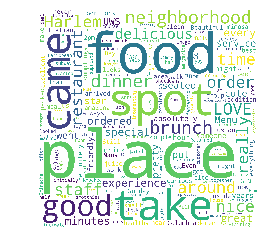

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h2>Let's do a detailed comparison of local restaurants</h2>
<h4>I've saved a few reviews for each restaurant in four directories</h4>
<h4>We'll use the PlainTextCorpusReader to read these directories</h4>
<li>PlainTextCorpusReader reads all matching files in a directory and saves them by file-ids

In [42]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
heights_root = "data/heights"
heights_files = "heights.*"
amigos_root = "data/amigos"
amigos_files = "amigos.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
heights_data = PlaintextCorpusReader(heights_root,heights_files)
amigos_data = PlaintextCorpusReader(amigos_root,amigos_files)

In [43]:
amigos_data.fileids()

['amigos.1',
 'amigos.10',
 'amigos.11',
 'amigos.12',
 'amigos.13',
 'amigos.14',
 'amigos.15',
 'amigos.16',
 'amigos.17',
 'amigos.18',
 'amigos.19',
 'amigos.2',
 'amigos.20',
 'amigos.21',
 'amigos.3',
 'amigos.4',
 'amigos.5',
 'amigos.6',
 'amigos.7',
 'amigos.8',
 'amigos.9']

In [44]:
amigos_data.raw()

'I see all these bad reviews, but speaking for myself, I\'ve never gotten bad service here, or had a negative experience in the least--and I\'m here about once a week.\n\nThe atmosphere is fun and laid back, but not in a divey way. I\'ve never had a bad dish, although some are merely average; however, a few are A+: THE QUESADILLAS, the Queso Fundido, and the margaritas are among the best I\'ve ever had. The guacamole is above average.\n\nAlso, they have really great specials during the week--I believe one day is something like $21.95 for unlimited quesadillas + 5 margaritas? That sounds so impossible even as I type it but I\'m pretty sure that\'s correct\nMy friend and I decided to go out on Cinco de Mayo but we wanted something close to home with a nice vibe, people and good music and food. I remember a friend telling me about this place a while back. So I decided to make a reservation.  Not only did we get there and find that it was packed BUT the receptionist explained that since we

<h4>We need to modify comparitive_emotion_analyzer to tell it where the restaurant name and the text is in the tuple</h4>

In [45]:
def comparative_emotion_analyzer(text_tuples,name_location=1,text_location=2):
    print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
            "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
            "sadness","surprise"))
        
    for text_tuple in text_tuples:
        text = text_tuple[text_location] 
        result = emotion_analyzer(text)
        print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
            text_tuple[name_location][0:20],result['fear'],result['trust'],
              result['negative'],result['positive'],result['joy'],result['disgust'],
              result['anticipation'],result['sadness'],result['surprise']))
        
#And test it        
comparative_emotion_analyzer(all_snippets)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Elma's               0.00	0.06	0.01	0.10	0.07	0.00	0.05	0.01	0.02
Lolo's Seafood Shack 0.01	0.01	0.01	0.04	0.02	0.00	0.01	0.00	0.01
Flat Top             0.00	0.02	0.00	0.06	0.01	0.00	0.01	0.00	0.00
Friedman's           0.00	0.04	0.00	0.08	0.05	0.00	0.01	0.00	0.01
B2 Harlem            0.00	0.01	0.02	0.04	0.02	0.00	0.01	0.01	0.01
Amy Ruth's           0.01	0.00	0.01	0.01	0.00	0.01	0.01	0.01	0.00
SEAK                 0.00	0.05	0.01	0.06	0.03	0.00	0.01	0.00	0.01
Clay                 0.00	0.04	0.02	0.07	0.04	0.00	0.04	0.00	0.00
La Salle Dumpling Ro 0.00	0.00	0.00	0.01	0.01	0.00	0.02	0.00	0.00
Thai Market          0.00	0.03	0.02	0.03	0.03	0.02	0.00	0.00	0.00
Junzi Kitchen        0.00	0.03	0.01	0.05	0.04	0.00	0.01	0.01	0.01
Pisticci             0.00	0.04	0.01	0.04	0.04	0.00	0.03	0.03	0.01
Belle Harlem         0.00	0.00	0.03	0.06	0.06	0.00	0.01	0.00	0.01
Babbalucci           0.00	0.01	0.00	0.02	0.01	0.00	0.

In [46]:
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('heights',heights_data.raw()), ('amigos',amigos_data.raw())]
comparative_emotion_analyzer(restaurant_data,0,1)

restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
community            0.00	0.03	0.01	0.05	0.03	0.01	0.02	0.01	0.01
le monde             0.00	0.03	0.01	0.04	0.02	0.00	0.02	0.00	0.01
heights              0.00	0.03	0.01	0.04	0.03	0.00	0.03	0.01	0.01
amigos               0.01	0.03	0.01	0.04	0.03	0.01	0.02	0.01	0.01


<h2>Simple Analysis: Complexity</h2>
<h4>We'll look at four complexity factors</h4>
<li>average word length: longer words adds to complexity
<li>average sentence length: longer sentences are more complex (unless the text is rambling!)
<li>vocabulary: the ratio of unique words used to the total number of words (more variety, more complexity)

<b>token:</b> A sequence (or group) of characters of interest. For e.g., in the below analysis, a token = a word
<li>Generally: A token is the base unit of analysis</li>
<li>So, the first step is to convert text into tokens and nltk text object</li>

In [47]:
#Construct tokens (words/sentences) from the text
text = le_monde_data.raw()
import nltk
from nltk import sent_tokenize,word_tokenize 
sentences = nltk.Text(sent_tokenize(text))
print(len(sentences))
words = nltk.Text(word_tokenize(text))
print(len(words))

188
2595


In [48]:
num_chars=len(text)
num_words=len(word_tokenize(text))
num_sentences=len(sent_tokenize(text))
vocab = {x.lower() for x in word_tokenize(text)} # the number of unique words. add it to a set of words.

print("%1s %1s %1s %1s"%("num_chars","num_chars/num_words","num_words/num_sentences","len(vocab)/num_words"))
print("%1f\t\t%1s\t\t%1s\t\t%1s"%(num_chars,int(num_chars/num_words),int(num_words/num_sentences),(len(vocab)/num_words)))

num_chars num_chars/num_words num_words/num_sentences len(vocab)/num_words
12332.000000		4		13		0.29132947976878615


<h4>Functionalize this</h4>

In [49]:
def get_complexity(text):
    num_chars=len(text)
    num_words=len(word_tokenize(text))
    num_sentences=len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)}
    
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words

In [50]:
get_complexity(le_monde_data.raw())

(756, 4, 13, 0.29132947976878615)

In [51]:
for text in restaurant_data:
    (vocab,word_size,sent_size,vocab_to_text) = get_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))
    
# le monde actually has the lowest sentence complexity. 13

community      	1029.00	4.00	16.00	0.28
le monde       	756.00	4.00	13.00	0.29
heights        	720.00	4.00	16.00	0.28
amigos         	792.00	4.00	15.00	0.24


<h4>We could do a word cloud comparison</h4>
We'll remove short words and look only at words longer than 6 letters

In [52]:
len(restaurant_data)
restaurant_data[0]

('community',
 'I ate here Monday night for a working dinner with a coworker. I immediately saw its reason for name, beyond the owner\'s fandom of the show of the same name: the tablet setup are nearly all communal long tables. There\'re rather few non-shared tables which is fine as not only is NYC filled with such setup but there\'s a liveliness in the Columbia area vibe which prefers this setup. There\'s a shortage of such nice sit-down restaurants in the Columbia area so this place is not only capitalizing on its presence but doing so with great style and flare.\n\nI ordered the beef burger which was very juicy, perfectly lean, well sauced, cooked as desired (medium-well, for those who wonder), and paired with a dill pickle, a handmade cole slaw that lacked mayo (which is good as mayo\'s pure trans-fat), and a spindle of fries. My coworker got the salmon sandwich, same review applies.\n\nAwesome bar alongside, but we didn\'t patronize it. Vast amounts of seating and an open kitchen 

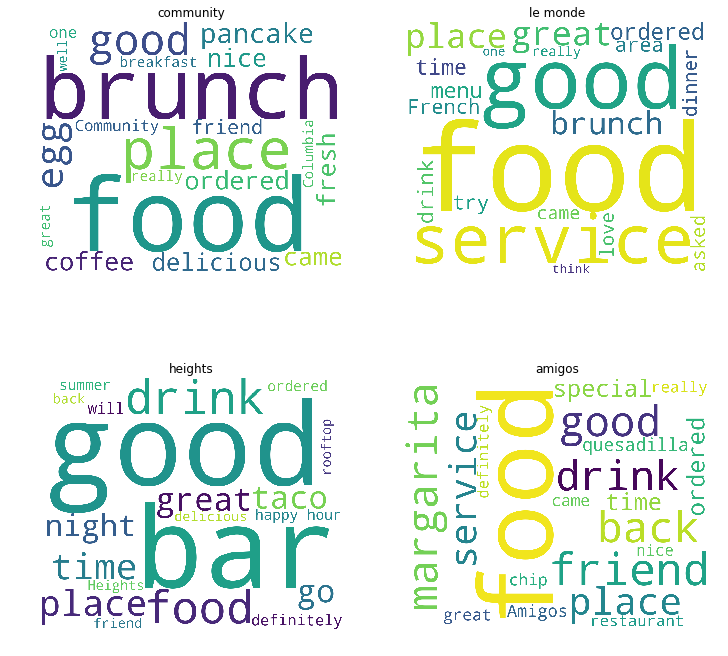

In [53]:
texts = restaurant_data
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
#As we look at the cloud, we can get rid of words that don't make sense by adding them to this variable
DELETE_WORDS = []
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(texts)):
    text_string = remove_words(texts[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i%2]
    ax = axes[i//2, i%2] #Use this if ROW_NUM >=2
    ax.set_title(texts[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

<h3>Comparing complexity of restaurant reviews won't get us anything useful</h3>
<h3>Let's look at something more useful</h3>

<h2>nltk: Python's natural language toolkit</h2>


<h3>ntlk documentation link:</h3> http://www.nltk.org/api/nltk.html
<h3>Commands cheat sheet</h3> https://blogs.princeton.edu/etc/files/2014/03/Text-Analysis-with-NLTK-Cheatsheet.pdf
<h3>nltk book</h3>http://www.nltk.org/book/

<h2>nltk contains a large corpora of pre-tokenized text</h2>
Load it using the command:<p>
nltk.download()

    

<h4>Import the corpora</h4>

In [62]:
from nltk.book import *

<h1>Often, a comparitive analysis helps us understand text better</h1>
<h2>Let's look at US Presidentinaugural speeches</h2>
<h4>Copy the files 2013-Obama.txt and 2017-Trump.txt to the nltk_data/corpora/inaugural directory. nltk_data should be under your home directory</h4>

In [61]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [56]:
inaugural.raw('1861-Lincoln.txt')

'Fellow-Citizens of the United States: In compliance with a custom as old as the Government itself, I appear before you to address you briefly and to take in your presence the oath prescribed by the Constitution of the United States to be taken by the President "before he enters on the execution of this office."\n\nI do not consider it necessary at present for me to discuss those matters of administration about which there is no special anxiety or excitement.\n\nApprehension seems to exist among the people of the Southern States that by the accession of a Republican Administration their property and their peace and personal security are to be endangered. There has never been any reasonable cause for such apprehension. Indeed, the most ample evidence to the contrary has all the while existed and been open to their inspection. It is found in nearly all the published speeches of him who now addresses you. I do but quote from one of those speeches when I declare that -- \n\nI have no purpo

<h4>Let's look at the complexity of the speeches by four presidents</h4>

In [57]:
texts = [('trump',inaugural.raw('2017-Trump.txt')),
         ('obama',inaugural.raw('2009-Obama.txt')+inaugural.raw('2013-Obama.txt')),
         ('jackson',inaugural.raw('1829-Jackson.txt')+inaugural.raw('1833-Jackson.txt')),
         ('washington',inaugural.raw('1789-Washington.txt')+inaugural.raw('1793-Washington.txt'))]
for text in texts:
    (vocab,word_size,sent_size,vocab_to_text) = get_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))

OSError: No such file or directory: '/Users/william/nltk_data/corpora/inaugural/2017-Trump.txt'

<h2>Analysis over time</h2>


<h3>The files are arranged over time so we can analyze how complexity has changed between Washington and Trump</h3>

In [ ]:
from nltk.corpus import inaugural
sentence_lengths = list()
for fileid in inaugural.fileids():
    sentence_lengths.append(get_complexity(' '.join(inaugural.words(fileid)))[2])
plt.plot(sentence_lengths)

<h1>dispersion plots</h1>
<h2>Dispersion plots show the relative frequency of words over the text</h2>
<h3>Let's see how the frequency of some words has changed over the course of the republic</h3>
<h3>That should give us some idea of how the focus of the nation has changed</h3>

In [ ]:
text4.dispersion_plot(["government", "citizen", "freedom", "duties", "America",'independence','God','patriotism'])

<h4>We may want to use word stems rather than the part of speect form</h4>
<li>For example: patriot, patriotic, patriotism all express roughly the same idea
<li>nltk has a stemmer that implements the "Porter Stemming Algorithm" (https://tartarus.org/martin/PorterStemmer/)
<li>We'll push everything to lowercase as well

In [ ]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
text = inaugural.raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
words = word_tokenize(striptext)
text = nltk.Text([p_stemmer.stem(i).lower() for i in words])
text.dispersion_plot(["govern", "citizen", "free", "america",'independ','god','patriot'])

<h2>Weighted word analysis using Vader</h2>
<h4>Vader contains a list of 7500 features weighted by how positive or negative they are</h4>
<h4>It uses these features to calculate stats on how positive, negative and neutral a passage is</h4>
<h4>And combines these results to give a compound sentiment (higher = more positive) for the passage</h4>
<h4>Human trained on twitter data and generally considered good for informal communication</h4>
<h4>10 humans rated each feature in each tweet in context from -4 to +4</h4>
<h4>Calculates the sentiment in a sentence using word order analysis</h4>
<li>"marginally good" will get a lower positive score than "extremely good"
<h4>Computes a "compound" score based on heuristics (between -1 and +1)</h4>
<h4>Includes sentiment of emoticons, punctuation, and other 'social media' lexicon elements</h4>


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
headers = ['pos','neg','neu','compound']
texts = restaurant_data
analyzer = SentimentIntensityAnalyzer()
for i in range(len(texts)):
    name = texts[i][0]
    sentences = sent_tokenize(texts[i][1])
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
    print(name,pos,neg,neu,compound)

<h4>And functionalize this as well</h4>

In [ ]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(texts)):
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [ ]:
vader_comparison(restaurant_data)

<h2>Named Entities</h2>
<h4>People, places, organizations</h4>
Named entities are often the subject of sentiments so identifying them can be very useful

<h4>Named entity detection is based on Part-of-speech tagging of words and chunks (groups of words)</h4>
<li>Start with sentences (using a sentence tokenizer)
<li>tokenize words in each sentence
<li>chunk them. ne_chunk identifies likely chunked candidates (ne = named entity)
<li>Finally build chunks using nltk's guess on what members of chunk represent (people, place, organization)


In [1]:
en={}
try:
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(community_data.raw().strip())
    for sentence in sentences:
            tokenized = nltk.word_tokenize(sentence)
            tagged = nltk.pos_tag(tokenized)
            chunked = nltk.ne_chunk(tagged)
            for tree in chunked:
                if hasattr(tree, 'label'):
                    ne = ' '.join(c[0] for c in tree.leaves())
                    en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
except Exception as e:
    print(str(e))
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(en)

name 'nltk' is not defined
{}


<h4>Assuming we've done a good job of identifying named entities, we can get an affect score on entities</h4>

In [ ]:
meaningful_sents = list()
i=0
for sentence in sentences:
    if 'service' in sentence:
        i+=1
        meaningful_sents.append((i,sentence))

vader_comparison(meaningful_sents)       

<h4>We could also develop a affect calculator for common terms in our domain (e.g., food items)</h4>

In [ ]:
def get_affect(text,word,lower=False):
    import nltk
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(text.strip())
    sentence_count = 0
    running_total = 0
    for sentence in sentences:
        if lower: sentence = sentence.lower()
        if word in sentence:
            vs = analyzer.polarity_scores(sentence) 
            running_total += vs['compound']
            sentence_count += 1
    if sentence_count == 0: return 0
    return running_total/sentence_count

In [ ]:
get_affect(community_data.raw(),'service',True)

<h4>The nltk function concordance returns text fragments around a word</h4>

In [ ]:
nltk.Text(community_data.words()).concordance('service',100)

<h2>Text summarization</h2>
<h4>Text summarization is useful because you can generate a short summary of a large piece of text automatically</h4>
<h4>Then, these summaries can serve as an input into a topic analyzer to figure out what the main topic of the text is</h4>

A naive form of summarization is to identify the most frequent words in a piece of text and use the occurrence of these words in sentences to rate the importance of a sentence. 

<h4>First the imports</h4>

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint

<h4>Then prep the text. Get rid of end of line chars</h4>

In [ ]:
text = community_data.raw()
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

<h4>Construct a list of words after getting rid of unimportant ones and numbers</h4>

In [ ]:
words = word_tokenize(striptext)
lowercase_words = [word.lower() for word in words
                  if word not in stopwords.words() and word.isalpha()]


<h4>Construct word frequencies and choose the most common n (20)</h4>

In [ ]:
word_frequencies = FreqDist(lowercase_words)
most_frequent_words = FreqDist(lowercase_words).most_common(20)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(most_frequent_words)

<h4>lowercase the sentences</h4>
candidate_sentences is a dictionary with the original sentence as the key, and its lowercase version as the value

In [ ]:
sentences = sent_tokenize(striptext)
for sentence in sentences:
    candidate_sentences[sentence] = sentence.lower()
candidate_sentences

In [ ]:
for long, short in candidate_sentences.items():
    count = 0
    for freq_word, frequency_score in most_frequent_words:
        if freq_word in short:
            count += frequency_score
            candidate_sentence_counts[long] = count

In [ ]:
sorted_sentences = OrderedDict(sorted(
                    candidate_sentence_counts.items(),
                    key = lambda x: x[0],
                    reverse = True)[:4])
pp.pprint(sorted_sentences)

<h4>Packaging all this into a function</h4>


In [ ]:
def build_naive_summary(text):
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import sent_tokenize
    from nltk.probability import FreqDist
    from nltk.corpus import stopwords
    from collections import OrderedDict
    summary_sentences = []
    candidate_sentences = {}
    candidate_sentence_counts = {}
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    words = word_tokenize(striptext)
    lowercase_words = [word.lower() for word in words
                      if word not in stopwords.words() and word.isalpha()]
    word_frequencies = FreqDist(lowercase_words)
    most_frequent_words = FreqDist(lowercase_words).most_common(20)
    sentences = sent_tokenize(striptext)
    for sentence in sentences:
        candidate_sentences[sentence] = sentence.lower()
    for long, short in candidate_sentences.items():
        count = 0
        for freq_word, frequency_score in most_frequent_words:
            if freq_word in short:
                count += frequency_score
                candidate_sentence_counts[long] = count   
    sorted_sentences = OrderedDict(sorted(
                        candidate_sentence_counts.items(),
                        key = lambda x: x[1],
                        reverse = True)[:4])
    return sorted_sentences   

In [ ]:
summary = '\n'.join(build_naive_summary(community_data.raw()))
print(summary)

In [ ]:
summary = '\n'.join(build_naive_summary(le_monde_data.raw()))
print(summary)

<h4>We can summarize George Washington's first inaugural speech<h4>

In [ ]:
build_naive_summary(inaugural.raw('2013-Obama.txt'))

<h3>gensim: another text summarizer</h3>
Gensim uses a network with sentences as nodes and 'lexical similarity' as weights on the arcs between nodes<p>


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
from nltk.book import *

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
heights_root = "data/heights"
heights_files = "heights.*"
amigos_root = "data/amigos"
amigos_files = "amigos.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
heights_data = PlaintextCorpusReader(heights_root,heights_files)
amigos_data = PlaintextCorpusReader(amigos_root,amigos_files)

In [ ]:
type(community_data)

In [ ]:
text = community_data.raw()
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

In [ ]:
import gensim.summarization

In [ ]:
!pip install gensim

In [ ]:
import gensim.summarization

In [ ]:
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)

In [ ]:
print(gensim.summarization.keywords(striptext,words=10))

In [ ]:
summary = '\n'.join(build_naive_summary(community_data.raw()))
print(summary)

In [ ]:
text = le_monde_data.raw()
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)
#print(gensim.summarization.keywords(striptext,words=10))

<h1>Topic modeling</h1>
<h4>The goal of topic modeling is to identify the major concepts underlying a piece of text</h4>
<h4>Topic modeling uses "Unsupervised Learning". No apriori knowledge is necessary
<li>Though it is helpful in cleaning up results!

<h3>LDA: Latent Dirichlet Allocation Model</h3>
<li>Identifies potential topics using pruning techniques like 'upward closure'
<li>Computes conditional probabilities for topic word sets
<li>Identifies the most likely topics
<li>Does this over multiple passes probabilistically picking topics in each pass
<li>Good intuitive explanation: http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

<h4>Prepare the text</h4>

In [ ]:
text = PlaintextCorpusReader("data/","Nikon_coolpix_4300.txt").raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
#words = word_tokenize(striptext)
#tokenize each sentence into word tokens
texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for sentence in sentences]
len(texts)

<h4>Create a (word,frequency) dictionary for each word in the text</h4>

In [ ]:
print(text)

In [ ]:
text

In [ ]:
dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
#print(dictionary.token2id)
#print(dictionary.keys())
#print(corpus[9])
#print(texts[9])
#print(dictionary[73])
#dictionary[4]

<h4>Do the LDA</h4>

<h4>Parameters:</h4>
<li>Number of topics: The number of topics you want generated. The larger the document, the more the desirable topics
<li>Passes: The LDA model makes through the document. More passes, slower analysis

In [ ]:
#Set parameters
num_topics = 5 #The number of topics that should be generated
passes = 10 

In [ ]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=10)

<h4>See results</h4>

In [ ]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=3))

<h2>Matching topics to documents</h2>
<h3>Sort topics by probability</h3>

<h4>We're using sentences as documents here, so this is less than ideal</h4>

In [ ]:
from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

<h3>Making sense of the topics</h3>


<h4>Draw wordclouds</h4>

In [ ]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(' '.join(word_list))


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
# Look at topic number 2
draw_wordcloud(lda,2)

<h4>Roughly,</h4>
<li>lda looks for candidate topics assuming that there are many such candidates
<li>looks for words related to the candidate topics
<li>assign probablilites to those words

<h3>Let's look at Presidential addresses to see what sorts of topics emerge from there</h3>
<li>Each document will be analyzed for topic</li>
<li>The corpus will consist of 58 documents, one per presidential address

In [ ]:
REMOVE_WORDS = {'shall','generally','spirit','country','people','nation','nations','great','better'}
#Create a word dictionary (id, word)
texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word not in REMOVE_WORDS and word.isalnum()]
        for sentence in sentences]
dictionary = corpora.Dictionary(texts)

#Create a corpus of documents
text_list = list()
for fileid in inaugural.fileids():
    text = inaugural.words(fileid)
    doc=list()
    for word in text:
        if word in STOPWORDS or word in REMOVE_WORDS or not word.isalpha() or len(word) <5:
            continue
        doc.append(word)
    text_list.append(doc)
by_address_corpus = [dictionary.doc2bow(text) for text in text_list]

<h2>Create the model</h2>

In [ ]:
lda = LdaModel(by_address_corpus,
              id2word=dictionary,
              num_topics=20,
              passes=10)

In [ ]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=10))

<h2>We can now compare presidential addresses by topic</h2>

In [ ]:
len(by_address_corpus)

In [ ]:
from operator import itemgetter
sorted(lda.get_document_topics(by_address_corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

In [ ]:
draw_wordcloud(lda,18)

In [ ]:
print(lda.show_topic(12,topn=5))
print(lda.show_topic(18,topn=5))

<h1>Similarity</h1>
<h2>Given a corpus of documents, when a new document arrives, find the document that is the most similar</h2>

In [ ]:
doc_list = [community_data,le_monde_data,amigos_data,heights_data]
all_text = community_data.raw() + le_monde_data.raw() + amigos_data.raw() + heights_data.raw()

documents = [doc.raw() for doc in doc_list]
texts = [[word for word in document.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for document in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = """
Many, many years ago, I used to frequent this place for their amazing french toast. 
It's been a while since then and I've been hesitant to review a place I haven't been to in 7-8 years... 
but I passed by French Roast and, feeling nostalgic, decided to go back.

It was a great decision.

Their Bloody Mary is fantastic and includes bacon (which was perfectly cooked!!), olives, 
cucumber, and celery. The Irish coffee is also excellent, even without the cream which is what I ordered.

Great food, great drinks, a great ambiance that is casual yet familiar like a tiny little French cafe. 
I highly recommend coming here, and will be back whenever I'm in the area next.

Juan, the bartender, is great!! One of the best in any brunch spot in the city, by far.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])


In [ ]:
sims

In [ ]:
doc="""
I went to Mexican Festival Restaurant for Cinco De Mayo because I had been there years 
prior and had such a good experience. This time wasn't so good. The food was just 
mediocre and it wasn't hot when it was brought to our table. They brought my friends food out 
10 minutes before everyone else and it took forever to get drinks. We let it slide because the place was 
packed with people and it was Cinco De Mayo. Also, the margaritas we had were slamming! Pure tequila. 

But then things took a turn for the worst. As I went to get something out of my purse which was on 
the back of my chair, I looked down and saw a huge water bug. I had to warn the lady next to me because 
it was so close to her chair. We called the waitress over and someone came with a broom and a dustpan and 
swept it away like it was an everyday experience. No one seemed phased.

Even though our waitress was very nice, I do not think we will be returning to Mexican Festival again. 
It seems the restaurant is a shadow of its former self.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims